<a href="https://colab.research.google.com/github/alu0100880755/Logistica/blob/master/TSP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



RUTA

	Distancia total de la ruta =  305.0 kilómetros

	Costos de distancia mínima:

		De 0 a 10 con distancia = 18 Km
		De 1 a 6 con distancia = 13 Km
		De 2 a 0 con distancia = 20 Km
		De 3 a 5 con distancia = 46 Km
		De 4 a 14 con distancia = 10 Km
		De 5 a 1 con distancia = 14 Km
		De 6 a 8 con distancia = 15 Km
		De 7 a 11 con distancia = 14 Km
		De 8 a 12 con distancia = 10 Km
		De 9 a 7 con distancia = 39 Km
		De 10 a 4 con distancia = 13 Km
		De 11 a 3 con distancia = 21 Km
		De 12 a 13 con distancia = 17 Km
		De 13 a 2 con distancia = 19 Km
		De 14 a 9 con distancia = 36 Km

	Orden de la ruta de distancia mínima:

	 0--> 10--> 4--> 14--> 9--> 7--> 11--> 3--> 5--> 1--> 6--> 8--> 12--> 13--> 2--> 0

DATOS DE INTERÉS

	Tiempo Empleado:  432  milisegundos, |  0.43  segundos |  0.01  minutos 
	Iteraciones:  688
	Nodos:  0

DIBUJO DE LA RUTA


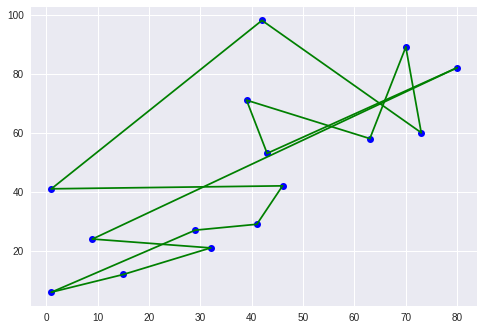

In [4]:
#Instalamos lo necesario
#!pip install ortools
from ortools.linear_solver import pywraplp

#Importamos las librerías necesarias
import random
import math
import matplotlib.pyplot as plt
import json

#Declaramos las constantes
nodos = 15
todos = range(nodos)
otros = range(1,nodos)

#Precisión
EPS = 0.001

#Semilla para que empiece por un punto similar siempre y poder comparar con varios modelos
random.seed(8888)

dist= { (i,j) : random.randint(10,100) for i in todos for j in todos if i!=j }

#Arcos óptimos para el posterior muestreo
dist_final = { }

#####################################################################################
#DIBUJAR LOS RESULTADOS

def dibuja(selected):
    points = [(random.randint(0,100),random.randint(0,100)) for i in todos]

    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')


#####################################################################################


#Primer modelo TSP
def TSP_1():
    solver = pywraplp.Solver('TSP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    #VARIABLES

    #Arcos elegidos
    x = {}
    for i in todos:
        for j in todos:
            x[i, j] = solver.BoolVar('x[%i, %i]' % (i, j))
    
    #Posición de i en T relativo a  1
    u = {}
    for i in otros:
        u[i] = solver.IntVar(0.0,solver.infinity(),'u[%i]' % (i))
    
    
    #Función objetivo
    solver.Minimize(solver.Sum([dist[i,j]*x[i,j] for i in todos for j in todos if i!=j]))

    
    #Restricciones
    [ solver.Add(  solver.Sum(x[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x[j,i] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  u[j] >= u[i] + x[i,j] - (nodos-2)*(1-x[i,j]) + (nodos-3)*x[j,i]   ) for i in otros for j in otros if j!=i ]


    #Resolvemos
    sol = solver.Solve()

    print("\n\nRUTA")
    
    if sol == solver.OPTIMAL:
            print('\n\tDistancia total de la ruta = ', solver.Objective().Value(),'kilómetros')

            #DISTANCIAS ENTRE NODOS
            print('\n\tCostos de distancia mínima:\n')
            for i in todos:
                for j in todos:
                    if i!=j and x[i,j].solution_value() > EPS :
                        print('\t\tDe %d a %d con distancia = %d Km'  % (i,j,dist[i,j]))
                        dist_final.update({ (i, j): dist[i,j] })   #Actualizamos el diccionario con las soluciones


            #ORDEN DE LA RUTA
            print('\n\tOrden de la ruta de distancia mínima:\n')
            ruta = '0'; i = 0;

            while i != -1:
                for j in todos:
                    if x[i, j].solution_value() > 0:
                        ruta += '--> ' + str(j)
                        aux = j
                if aux != 0:
                    i = aux
                else:
                    i = -1
            #Mostramos el orden de la ruta
            print("\t", ruta)
            

            #Muestreo del tiempo
            print("\nDATOS DE INTERÉS")

            milisegundos = solver.WallTime()
            segundos = round((milisegundos/1000),2)
            minutos = round((segundos/60),2)
            print("\n\tTiempo Empleado: ", milisegundos, " milisegundos, | ", segundos , " segundos | ", minutos, " minutos ")
            print("\tIteraciones: ", solver.Iterations())
            print("\tNodos: ", solver.nodes())

    else:
            print('\nNo existe solución óptima')

    #DIBUJO DE LA RUTA
    print('\nDIBUJO DE LA RUTA')
    dibuja(dist_final)
    
    
#Llamamos a la funcion
TSP_1()        
       